<a href="https://colab.research.google.com/github/rohit9650/ML/blob/master/AML/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
Assignment 2:

k-means clustering

- choose a dataset other than the mnist
- apply k-means clustering and evaluate the results
- visualize the data using t-sne
'''

from google.colab import files
files.upload()

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Jan 29 19:16 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
mohansacharya/graduate-admissions                            Graduate Admissions                                   9KB  2018-12-28 10:07:14           6076  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59           4881  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56           2018  
safegraph/visit-patterns-by-census-block-group               Consumer & Visitor Insights For Neighborhoods        66MB  2018-12-19 21:31:50            206  
rmisra/news-headlines-dataset-for-sarcasm-detection       

In [0]:
# Copy the Fashion-MNIST data set locally.
!kaggle datasets download -d zalando-research/fashionmnist

 87% 60.0M/68.8M [00:01<00:00, 26.1MB/s]
100% 68.8M/68.8M [00:01<00:00, 46.0MB/s]


In [0]:
!unzip '/content/fashionmnist.zip'

Archive:  /content/fashionmnist.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: fashion-mnist_test.csv  
  inflating: train-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-labels-idx1-ubyte  


In [0]:
import pandas as pd

train_data = pd.read_csv('/content/fashion-mnist_train.csv')
x_train = train_data.iloc[:,1:].values
y_train = train_data.label.values

test_data = pd.read_csv('/content/fashion-mnist_test.csv')
x_test = test_data.iloc[:,1:].values
y_test = test_data.label.values


'''# Reshape x, 28 px by 28 px, rescale to 0-1(same for digit mnist)

x_train = x_train.reshape(x_train.shape[0],28,28)
x_train = x_train/255

x_test = x_test.reshape(x_test.shape[0],28,28)
x_test = x_test/255'''

'# Reshape x, 28 px by 28 px, rescale to 0-1(same for digit mnist)\n\nx_train = x_train.reshape(x_train.shape[0],28,28)\nx_train = x_train/255\n\nx_test = x_test.reshape(x_test.shape[0],28,28)\nx_test = x_test/255'

In [0]:
print(x_train.shape)

(60000, 784)


In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(x_train)
kmeans.cluster_centers_.shape

(10, 784)

In [0]:
from scipy.stats import mode
import numpy as np

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, labels)

0.5549666666666667

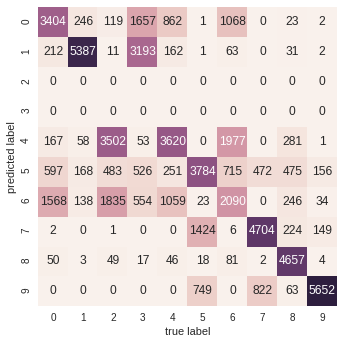

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_train, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(x_train)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]

# Compute the accuracy
print(accuracy_score(y_train, labels))

0.58125
